# **Análisis y Predicción de Precios de Autos (Core)**

### **Modelo basado en Arbol**

### **Objetivo:**

Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle. Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.

### **Parte 1: Análisis Exploratorio de Datos (EDA)**

 **1. Carga y Exploración de Datos:**

- Cargar el dataset y revisar la estructura básica.

- Descripción de las variables y su distribución.

- Detección y tratamiento de valores nulos.

- Identificación y tratamiento de outliers.

- Análisis de correlación entre variables.

In [1]:
# Se importan las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



**Cargar el dataset y revisar la estructura básica.**

In [2]:
# Se cargan los datos
df = pd.read_csv("Automobile_data.csv")

In [3]:
# Se muestran los primeros registros
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


**Descripción de las variables y su distribución.**

In [4]:
# Se muestra la informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Segun la informacion anterior, el dataframe tiene 205 registros y todas las variables tienen los 205 valores, no obstante, algunas columnas tienes valores '?' que considerare Nan.

Tambien se puede apreciar que existen valores de tipo 'object' que se deben transformar

**Descripción de las variables y su distribución.**

In [5]:
# variables de tipo object que contienen numero las convierto en numericas
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors='coerce')
df["bore"] = pd.to_numeric(df["bore"], errors='coerce')
df["stroke"] = pd.to_numeric(df["stroke"], errors='coerce')
df["horsepower"] = pd.to_numeric(df["horsepower"], errors='coerce')
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')

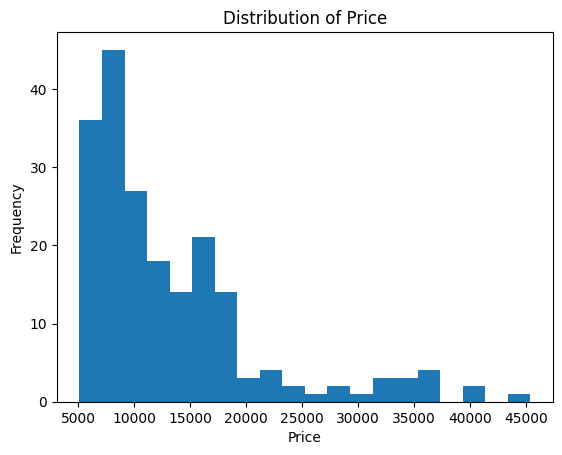

In [6]:
# Grafico de histograma de Price
plt.hist(df["price"], bins=20)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Price")
plt.show()


Se puede apreciar que la ventas de dan mientras los precios son mas bajos

**Detección y tratamiento de valores nulos.**

In [7]:
# buscamos valores Nan
df.isna().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0



Despues de cambiar estos tipos de datos a numericos, analizando los datos tenemos valores 'Nan' en los siguientes campos

- normalized-losses
- bore
- stroke
- horsepower
- peak-rpm
- price

Cambiaremos estos nulos por el promedio, segun marca (make) y tipo de combustible (fuel_type).


In [8]:
# Cambiaremos estos nulos de normalized-losses, bore, stroke, horsepower, peak-rpm, price  por el promedio, segun make y fuel_type
df["normalized-losses"] = df.groupby(["make", "fuel-type"])["normalized-losses"].transform(lambda x: x.fillna(x.mean()))
df["bore"] = df.groupby(["make", "fuel-type"])["bore"].transform(lambda x: x.fillna(x.mean()))
df["stroke"] = df.groupby(["make", "fuel-type"])["stroke"].transform(lambda x: x.fillna(x.mean()))
df["horsepower"] = df.groupby(["make", "fuel-type"])["horsepower"].transform(lambda x: x.fillna(x.mean()))
df["peak-rpm"] = df.groupby(["make", "fuel-type"])["peak-rpm"].transform(lambda x: x.fillna(x.mean()))
df["price"] = df.groupby(["make", "fuel-type"])["price"].transform(lambda x: x.fillna(x.mean()))


In [9]:
# vuelvo a buscamos valores Nan
df.isna().sum()

,0
symboling,0
normalized-losses,12
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


Sigo teniendo valores nulos... aplicare cambiar por la media de todos los datos, sin agrupar.

In [10]:
# Cambiaremos los nulos de normalized-losses, bhorsepower y peak-rpm por la media
df["normalized-losses"] = df["normalized-losses"].fillna(df["normalized-losses"].mean())
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())
df["peak-rpm"] = df["peak-rpm"].fillna(df["peak-rpm"].mean())

In [11]:
# vuelvo a buscamos valores Nan
df.isna().sum()

,0
symboling,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


Ya no tengo valores Nan

El campo num-of-doors es de tipo string y contiene registros con valores ?. Los cambiare por la moda, dependiendo de la marca y estilo

In [12]:
# En el campo num-of-doors reemplazo los valores ? por la moda de la columna
df["num-of-doors"] = df["num-of-doors"].replace("?", df["num-of-doors"].mode()[0])

**Identificación y tratamiento de outliers.**

In [13]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,127.125487,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,127.125487,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,127.125487,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.000000,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.000000,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [17]:
n_rows

4

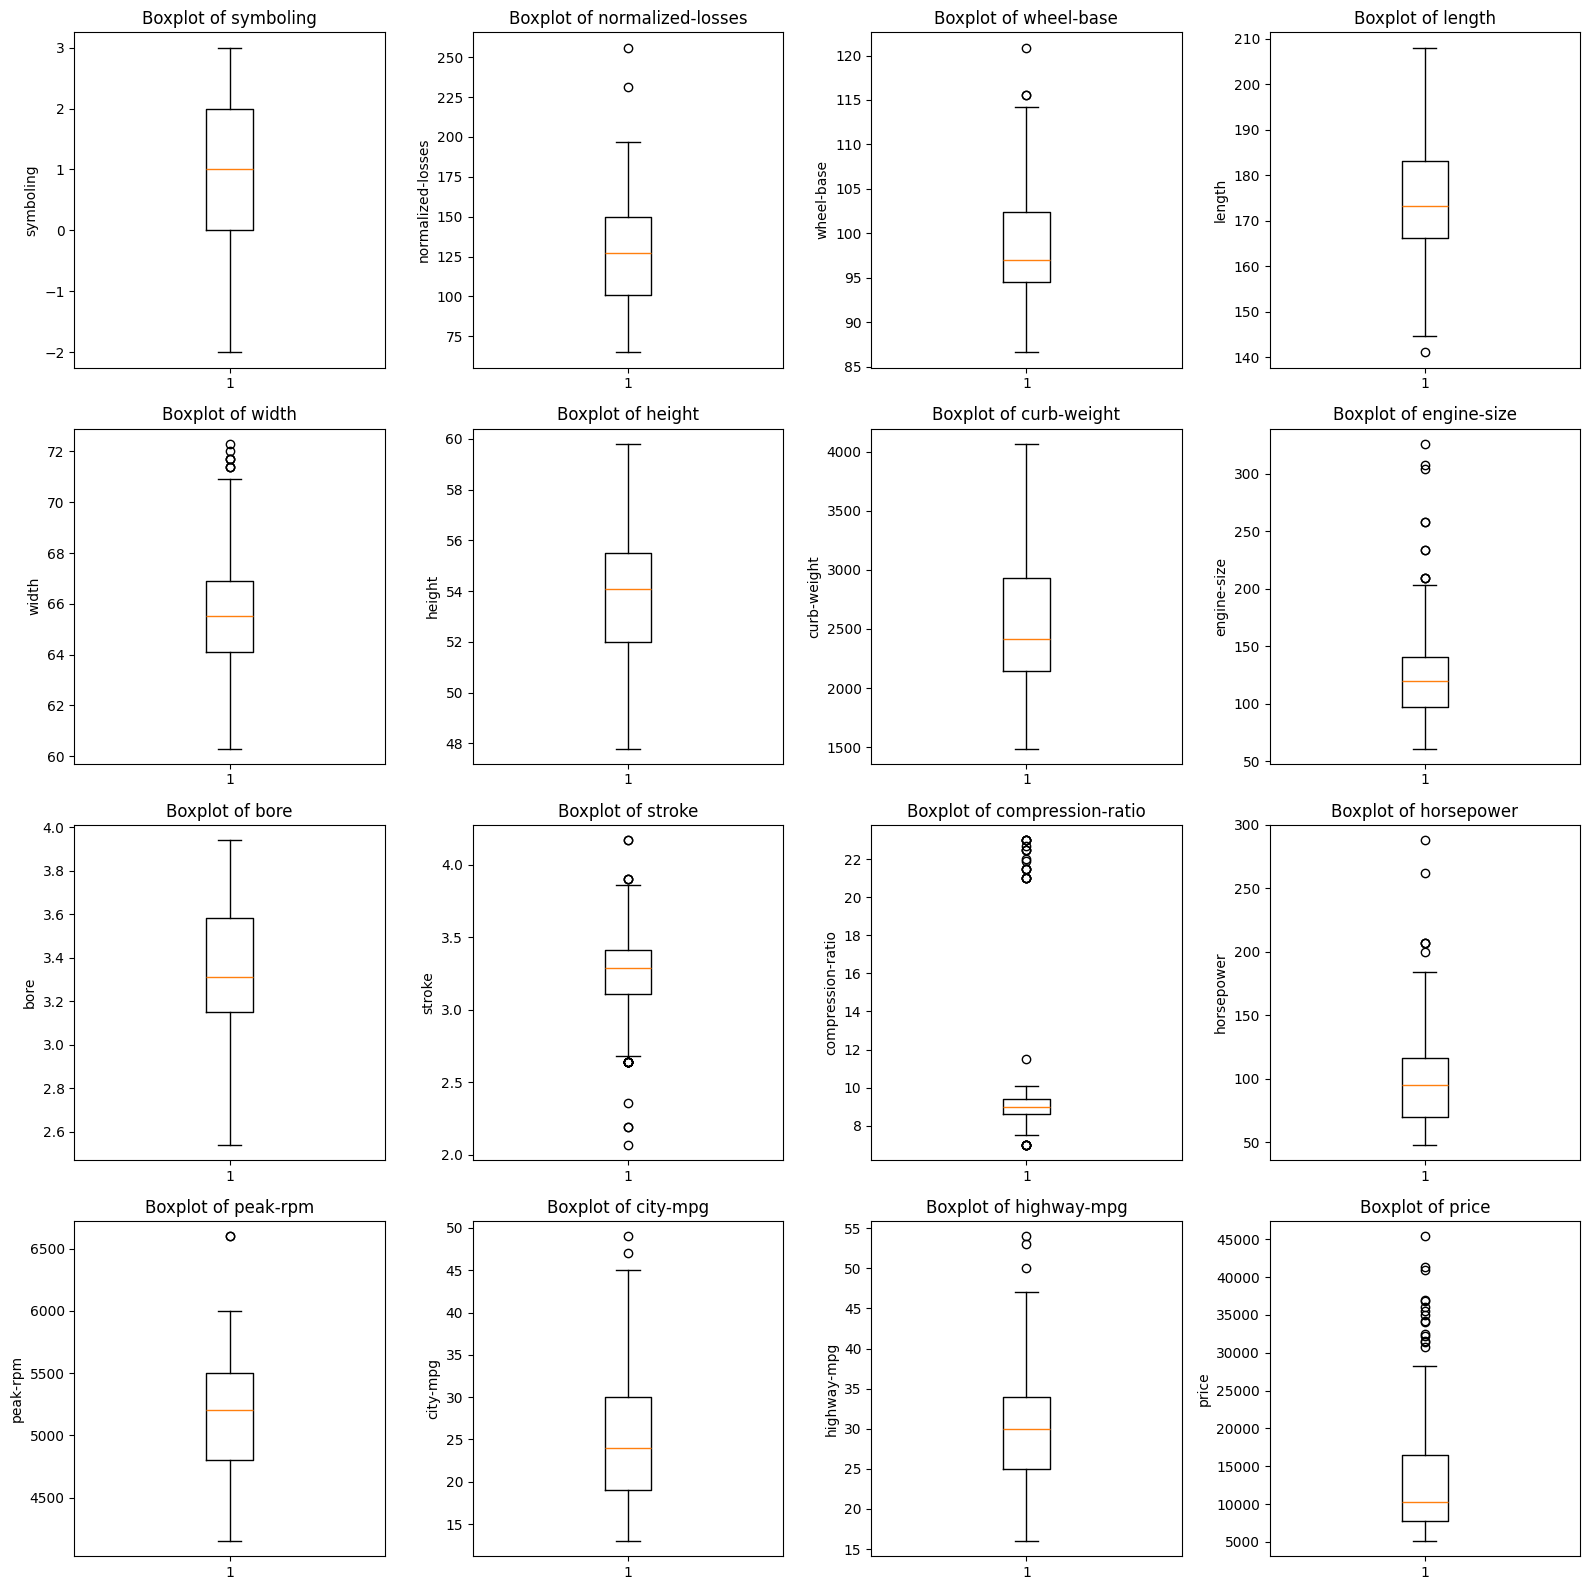

In [18]:
# Graficos de Boxplot para buscar outliers

# Obtengo solo las columnas numéricas.
numerical_cols = df.select_dtypes(include=np.number).columns

# Creo el subplot.
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten() # Para poder iterar sobre una lista plana de ejes

# boxplots para cada columna numérica.
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col].dropna()) # Manejar posibles valores NaN
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

**Análisis de correlación entre variables.**

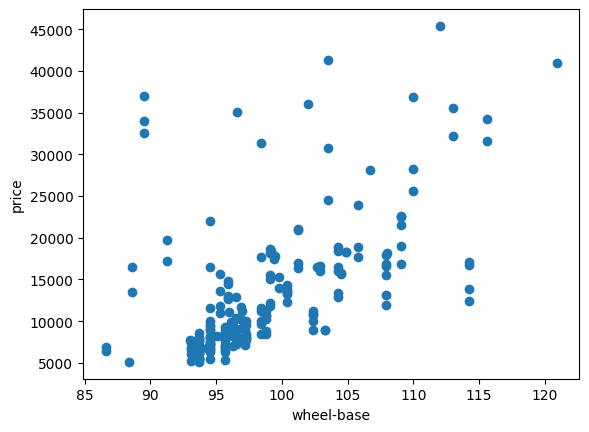

In [19]:
# Hare un grafico tipo scatter para ver relacion entre wheel-base y price
plt.scatter(df["wheel-base"], df["price"])
plt.xlabel("wheel-base")
plt.ylabel("price")
plt.show()


En algunos casos se ve una relacion, pero no esta muy marcada

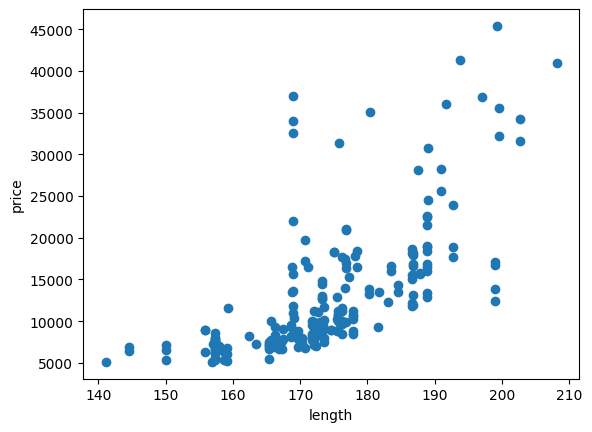

In [20]:
# Hare un grafico tipo scatter para ver relacion entre length y price
plt.scatter(df["length"], df["price"])
plt.xlabel("length")
plt.ylabel("price")
plt.show()

En algunos casos se ve una relacion, pero no esta muy marcada

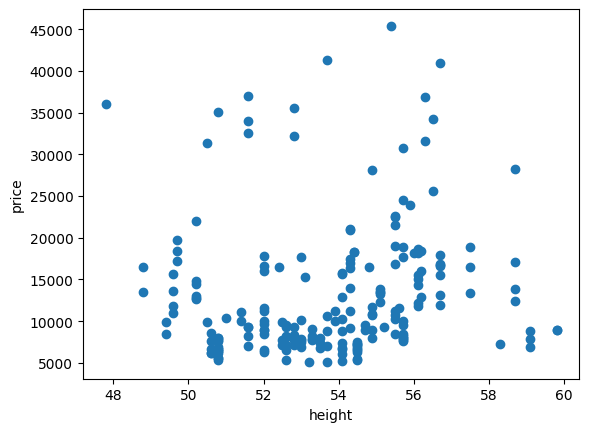

In [21]:
# Hare un grafico tipo scatter para ver relacion entre height y price
plt.scatter(df["height"], df["price"])
plt.xlabel("height")
plt.ylabel("price")
plt.show()

No existe correlacion entre esta variable con Price

### **Parte 2: Preparación de Datos**

 **2. Preprocesamiento:**

- Selección de características importantes.
- Transformación de variables categóricas.
- División del conjunto de datos en entrenamiento y prueba.
- Escalado de características.

**Selección de características importantes.**

In [22]:
# Se muestra la informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [23]:
# Definir features y target.
X = df.drop(columns="price")
y = df["price"]

**Transformación de variables categóricas.**

In [24]:
# Definir transformadores.
num_cols = ["symboling", "normalized-losses", "wheel-base", "length", "width", "height", "curb-weight", "engine-size", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]
nom_cols = ["make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system"]


**División del conjunto de datos en entrenamiento y prueba.**

In [25]:
# Utilizo Tran_Test_Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Escalado de características.**

In [26]:
# Definir transformadores.
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols),
])

### **Parte 3: Modelos de Regresión**

**3. Regresión Lineal:**

- Entrenamiento del modelo.
- Evaluación del rendimiento (MSE y R²).

Regresion Lineal

In [27]:

# Modelo.
pipeline_lr = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

In [28]:
# Entrenamiento.
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['symboling',
                                                   'normalized-losses',
                                                   'wheel-base', 'length',
                                                   'width', 'height',
                                                   'curb-weight', 'engine-size',
                                                   'bore', 'stroke',
                                                   'compression-ratio',
                                                   'horsepower', 'peak-rpm',
                                                   'city-mpg', 'highway-mpg']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'fuel-type',
                                                   'aspiration', 'num-of-doors',
                                                   'body-style', 'drive-wheels',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system'])])),
                ('model', LinearRegression())])

In [29]:
# Prediccion.
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_lr

array([29771.2462133 , 21683.3917508 , 10968.91660514, 12933.76890527,
       30333.51204382,  6818.37213082,  7784.05566048,  7144.11878087,
        9427.52529207,  7952.4929434 , 13417.8432306 ,  6408.74909969,
       15459.07531804,  9631.8379348 , 43366.63619932,  6271.75701122,
       -2986.83903664, 13697.48883146,  8810.81550263,  9777.09539855,
       11475.45773534, 15681.93314788,  8019.55360846,  4884.23092238,
        7016.19946896, 30225.64562414, 11216.19923557, 15779.63402321,
        6164.25536948, 16346.54788658, 29677.45624162,  6910.15835035,
        5203.01516059, 17548.52213585,  8196.47959845, 28921.75868539,
       11921.57734161, 12729.01767827,  9275.90493412, 14255.64695096,
        8210.60531101])

In [30]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("MSE:", mse_lr)
print("R2:", r2_lr)


MSE: 7855157.105991977
R2: 0.9004971240946091


KNN

In [31]:
# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor),
    ("model", KNeighborsRegressor(n_neighbors=5))
])

In [32]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['symboling',
                                                   'normalized-losses',
                                                   'wheel-base', 'length',
                                                   'width', 'height',
                                                   'curb-weight', 'engine-size',
                                                   'bore', 'stroke',
                                                   'compression-ratio',
                                                   'horsepower', 'peak-rpm',
                                                   'city-mpg', 'highway-mpg']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'fuel-type',
                                                   'aspiration', 'num-of-doors',
                                                   'body-style', 'drive-wheels',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system'])])),
                ('model', KNeighborsRegressor())])

In [33]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_knn

array([22839.8, 18399.6,  8106.2, 14265.8, 20381. ,  6467.4,  8656.4,
        7316.8,  8768.2,  9845.8, 15129. ,  7029.4, 16627. , 10516.8,
       36852.8,  6836. ,  6350.9, 12090.2,  9161.4,  8768.2,  9975.8,
       14969.6,  6461. ,  5645.4,  6903.2, 22480. , 11771. , 18184. ,
        7278.2, 18203. , 20424. ,  6742.2,  7982.6, 18038. ,  8742. ,
       20424. ,  8768.2, 12126.4,  7506.1, 12090.2,  8768.2])

In [34]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("MSE:", mse_knn)
print("R2:", r2_knn)

MSE: 17308149.47116531
R2: 0.7807541433299147


Arbol de Decision

In [35]:
# Modelo.
pipeline_tree = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=8, random_state=42))
])

In [36]:
# Entrenamiento.
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['symboling',
                                                   'normalized-losses',
                                                   'wheel-base', 'length',
                                                   'width', 'height',
                                                   'curb-weight', 'engine-size',
                                                   'bore', 'stroke',
                                                   'compression-ratio',
                                                   'horsepower', 'peak-rpm',
                                                   'city-mpg', 'highway-mpg']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'fuel-type',
                                                   'aspiration', 'num-of-doors',
                                                   'body-style', 'drive-wheels',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system'])])),
                ('model', DecisionTreeRegressor(max_depth=8, random_state=42))])

In [37]:
# Prediccion.
y_pred_tree = pipeline_tree.predict(X_test)
y_pred_tree

array([36880.        , 16278.        ,  8946.71428571, 12170.        ,
       35056.        ,  5156.5       ,  7995.        ,  8401.5       ,
        8946.71428571,  7995.        , 15250.        ,  7968.4       ,
       15645.        , 10092.75      , 45400.        ,  6384.57142857,
        5514.33333333, 14869.        ,  7424.33333333,  8946.71428571,
       10092.75      , 13949.        ,  7291.63636364,  5368.5       ,
        7291.63636364, 36880.        , 10092.75      , 15991.42857143,
        7291.63636364, 15991.42857143, 35056.        ,  6384.57142857,
        7424.33333333, 18882.5       ,  7968.4       , 35056.        ,
       11694.        , 11845.        ,  8916.5       , 14869.        ,
        8946.71428571])

In [38]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("MSE:", mse_tree)
print("R2:", r2_tree)

MSE: 7882207.957884952
R2: 0.9001544654408453


### **Parte 4: Benchmarking y Comparación de Modelos**

 **6. Comparación de Modelos:**

Comparar los resultados de los tres modelos en términos de MSE y R².

Discusión sobre las diferencias en el rendimiento de los modelos.


In [39]:
# imprimo MSE y R2
print("Regresion Lineal")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))
print("KNN")
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("R2:", r2_score(y_test, y_pred_knn))
print("Arbol")
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R2:", r2_score(y_test, y_pred_tree))



Regresion Lineal
MSE: 7855157.105991977
R2: 0.9004971240946091
KNN
MSE: 17308149.47116531
R2: 0.7807541433299147
Arbol
MSE: 7882207.957884952
R2: 0.9001544654408453


### **Conclusión**

**7. Interpretación de Resultados:**

- Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.

- Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.

Text(0.5, 1.0, 'R2 de los modelos')

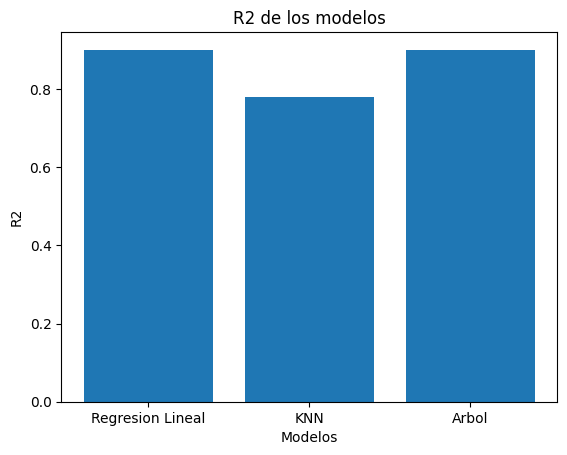

In [40]:
# grafico de r2 de los modelos
plt.bar(["Regresion Lineal", "KNN", "Arbol"], [r2_lr, r2_knn, r2_tree])
plt.xlabel("Modelos")
plt.ylabel("R2")
plt.title("R2 de los modelos")


**Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.**

En base a los resultados obtenidos, el Arbol de Decision y Regresion Lineal son los que tuviron un mejor rendimiento (90%)


**Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas**

- Mejoras sugeridas para estos modelos seria probar con otros hiperparametros

- Volver a revisar la data y tratar de mejor manera los valores nulos

- Entrenar los algoritmoscon validacion cruzada